In [1]:
# Welcome to your new notebook
# Type here in the cell editor to add code!
# You may not need this if pandas is already available
%pip install pandas openpyxl

StatementMeta(, d75be9e4-c487-4782-a879-a31f3e507675, 8, Finished, Available, Finished)


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

StatementMeta(, d75be9e4-c487-4782-a879-a31f3e507675, 10, Finished, Available, Finished)

In [3]:

# Load the Excel file from the Lakehouse
studentData = "/lakehouse/default/Files/StudentData.csv"
AcademicData = "/lakehouse/default/Files/Academic_Performance.csv"
ResourceData = "/lakehouse/default/Files/ResourceData.csv"
ResourcesUsage = "/lakehouse/default/Files/ResourcesUsage.csv"



# Load the data from the first sheet
studentData = pd.read_csv(studentData)
AcademicData = pd.read_csv(AcademicData)
ResourceData = pd.read_csv(ResourceData)
ResourceUsage = pd.read_csv(ResourcesUsage)

# Show the first few rows of the data
studentData.head()


StatementMeta(, d75be9e4-c487-4782-a879-a31f3e507675, 11, Finished, Available, Finished)

,student_id,Full_Name,date_of_birth,gender,admission_date,current_class,parental_education,household_income,state_of_origin,learning_disability,Club,age
0,1.0,Abisoye Bello,2006-05-25,Male,2023/2024,SS3,Primary,Low,Abuja,Dyslexia,2.0,18.0
1,2.0,Esther Ogunbiyi,2007-01-01,Female,2022/2023,SS2,Primary,Low,Lagos,NaN,2.0,17.0
2,3.0,Daniel Maryam,2005-05-22,Female,2023/2024,SS3,Secondary,Medium,Rivers,Dyslexia,1.0,19.0
3,4.0,Ozoemena Ibrahim,2009-02-13,Male,2021/2022,SS1,NaN,Low,Enugu,Dyslexia,3.0,15.0
4,5.0,Jumoke Okonkwo,2007-02-09,Male,2022/2023,SS2,Secondary,Low,Kano,NaN,4.0,17.0


In [4]:
AcademicData.head()

StatementMeta(, d75be9e4-c487-4782-a879-a31f3e507675, 12, Finished, Available, Finished)

,ID,student_id,Subject,Semester,Score,UsageID,ClubID,SubjectID
0,1,1,Biology,S1,32,NaN,NaN,NaN
1,2,2,Biology,S1,90,NaN,NaN,NaN
2,3,3,Biology,S1,68,NaN,NaN,NaN
3,4,4,Biology,S1,52,NaN,NaN,NaN
4,5,5,Biology,S1,27,NaN,NaN,NaN


In [5]:
# Merging 'Subject' and 'Semester' with an underscore separator
AcademicData['Subject_Semester'] = AcademicData['Subject'] + '_' + AcademicData['Semester']

StatementMeta(, d75be9e4-c487-4782-a879-a31f3e507675, 13, Finished, Available, Finished)

In [6]:
# Creating a pivot table
academic_performance = pd.pivot_table(AcademicData, values='Score', index='student_id', columns='Subject_Semester', aggfunc='sum')

# Display the pivot table
academic_performance.head()


StatementMeta(, d75be9e4-c487-4782-a879-a31f3e507675, 14, Finished, Available, Finished)

Subject_Semester,Biology_S1,Biology_S2,Biology_S3,Chemistry_S1,Chemistry_S2,Chemistry_S3,English_S1,English_S2,English_S3,Mathematics_S1,Mathematics_S2,Mathematics_S3,Physics_S1,Physics_S2,Physics_S3
student_id,,,,,,,,,,,,,,,
1,32,99,82,89,53,41,78,33,71,95,93,75,86,50,60
2,90,53,0,59,95,0,99,96,0,65,78,0,48,55,0
3,68,70,22,55,86,62,70,92,34,61,68,50,50,62,57
4,52,0,0,63,0,0,62,0,0,91,0,0,37,0,0
5,27,31,0,52,87,0,42,59,0,28,49,0,76,47,0


In [7]:
academic_performance.info()

StatementMeta(, d75be9e4-c487-4782-a879-a31f3e507675, 15, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1 to 500
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Biology_S1      500 non-null    int64
 1   Biology_S2      500 non-null    int64
 2   Biology_S3      500 non-null    int64
 3   Chemistry_S1    500 non-null    int64
 4   Chemistry_S2    500 non-null    int64
 5   Chemistry_S3    500 non-null    int64
 6   English_S1      500 non-null    int64
 7   English_S2      500 non-null    int64
 8   English_S3      500 non-null    int64
 9   Mathematics_S1  500 non-null    int64
 10  Mathematics_S2  500 non-null    int64
 11  Mathematics_S3  500 non-null    int64
 12  Physics_S1      500 non-null    int64
 13  Physics_S2      500 non-null    int64
 14  Physics_S3      500 non-null    int64
dtypes: int64(15)
memory usage: 62.5 KB


In [8]:
ResourceData.head()

StatementMeta(, d75be9e4-c487-4782-a879-a31f3e507675, 16, Finished, Available, Finished)

,ResourceID,Type,Quality
0,100,Computer Lab,Low
1,200,Science Lab,Low
2,300,Library,Medium


In [9]:
ResourceUsage.head()

StatementMeta(, d75be9e4-c487-4782-a879-a31f3e507675, 17, Finished, Available, Finished)

,UsageID,student_id,ResourceID,UsageDate,Duration
0,1,400,300,12/11/2022,69
1,2,264,100,20/03/2023,70
2,3,131,200,11/07/2021,86
3,4,43,200,18/02/2023,42
4,5,310,100,12/06/2024,19


In [10]:
re_dur = ResourceUsage.groupby("student_id")["Duration"].mean().reset_index(name='Resource_Duration')
re_count = ResourceUsage.groupby("student_id")["ResourceID"].count().reset_index(name='Resource_Count')

StatementMeta(, d75be9e4-c487-4782-a879-a31f3e507675, 18, Finished, Available, Finished)

In [11]:
print(re_dur.head())
print(re_dur.shape)

StatementMeta(, d75be9e4-c487-4782-a879-a31f3e507675, 19, Finished, Available, Finished)

   student_id  Resource_Duration
0           1               43.0
1           2               56.0
2           4               56.0
3           6               33.0
4           7               61.0
(318, 2)


In [12]:
print(re_count.head())
print(re_count.shape)

StatementMeta(, d75be9e4-c487-4782-a879-a31f3e507675, 20, Finished, Available, Finished)

   student_id  Resource_Count
0           1               2
1           2               1
2           4               1
3           6               1
4           7               1
(318, 2)


In [13]:
# Merging Student Data and Academic Data on 'student_id'
perf_data = pd.merge(studentData, academic_performance, on='student_id')
# Performing a left join
perf_data = pd.merge(perf_data, re_dur, on='student_id', how='left')
perf_data = pd.merge(perf_data, re_count, on='student_id', how='left')

# Replacing NaN values with 0
perf_data = perf_data.fillna(0)

# Verify the merged DataFrame
perf_data.head()


StatementMeta(, d75be9e4-c487-4782-a879-a31f3e507675, 21, Finished, Available, Finished)

,student_id,Full_Name,date_of_birth,gender,admission_date,current_class,parental_education,household_income,state_of_origin,learning_disability,...,English_S2,English_S3,Mathematics_S1,Mathematics_S2,Mathematics_S3,Physics_S1,Physics_S2,Physics_S3,Resource_Duration,Resource_Count
0,1.0,Abisoye Bello,2006-05-25,Male,2023/2024,SS3,Primary,Low,Abuja,Dyslexia,...,33,71,95,93,75,86,50,60,43.0,2.0
1,2.0,Esther Ogunbiyi,2007-01-01,Female,2022/2023,SS2,Primary,Low,Lagos,0,...,96,0,65,78,0,48,55,0,56.0,1.0
2,3.0,Daniel Maryam,2005-05-22,Female,2023/2024,SS3,Secondary,Medium,Rivers,Dyslexia,...,92,34,61,68,50,50,62,57,0.0,0.0
3,4.0,Ozoemena Ibrahim,2009-02-13,Male,2021/2022,SS1,0,Low,Enugu,Dyslexia,...,0,0,91,0,0,37,0,0,56.0,1.0
4,5.0,Jumoke Okonkwo,2007-02-09,Male,2022/2023,SS2,Secondary,Low,Kano,0,...,59,0,28,49,0,76,47,0,0.0,0.0


In [14]:
perf_data.info()

StatementMeta(, d75be9e4-c487-4782-a879-a31f3e507675, 22, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   student_id           500 non-null    float64
 1   Full_Name            500 non-null    object 
 2   date_of_birth        500 non-null    object 
 3   gender               500 non-null    object 
 4   admission_date       500 non-null    object 
 5   current_class        500 non-null    object 
 6   parental_education   500 non-null    object 
 7   household_income     500 non-null    object 
 8   state_of_origin      500 non-null    object 
 9   learning_disability  500 non-null    object 
 10  Club                 500 non-null    float64
 11  age                  500 non-null    float64
 12  Biology_S1           500 non-null    int64  
 13  Biology_S2           500 non-null    int64  
 14  Biology_S3           500 non-null    int64  
 15  Chemistry_S1         500 non-null    int

StatementMeta(, d75be9e4-c487-4782-a879-a31f3e507675, 23, Finished, Available, Finished)

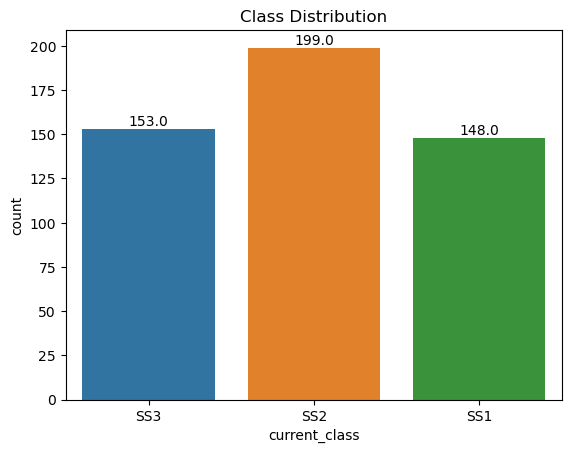

In [15]:
sns.countplot(x='current_class', data=perf_data)
plt.title('Class Distribution')

# Add labels to the top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.show()


StatementMeta(, d75be9e4-c487-4782-a879-a31f3e507675, 24, Finished, Available, Finished)

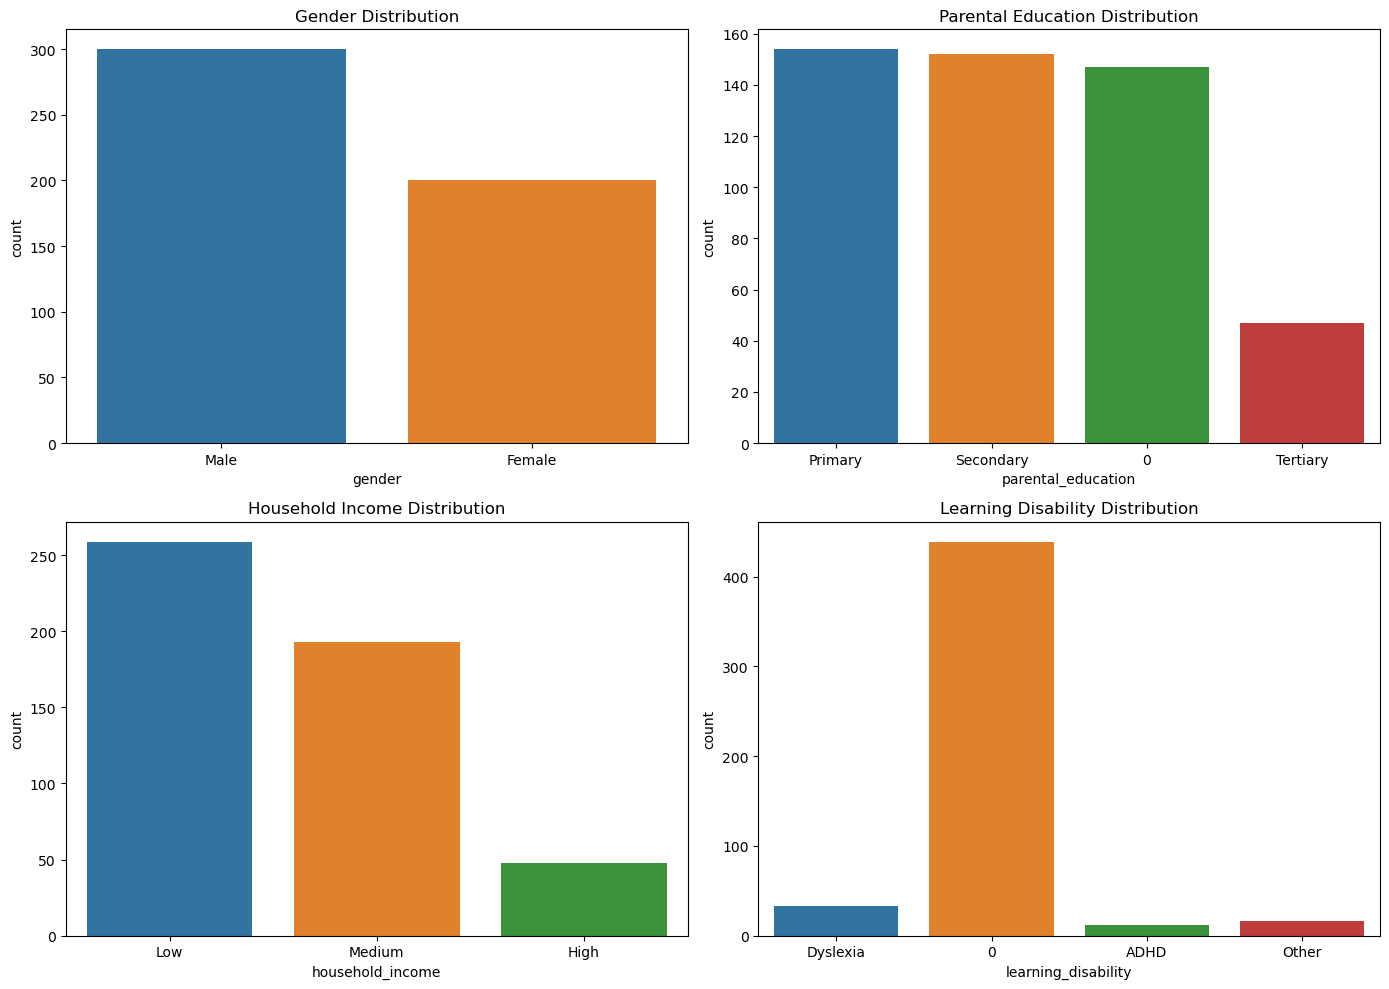

In [16]:
# Univariate Analysis - Categorical Features
plt.figure(figsize=(14, 10))

# Gender Distribution
plt.subplot(2, 2, 1)
sns.countplot(x='gender', data=perf_data)
plt.title('Gender Distribution')

# Parental Education Distribution
plt.subplot(2, 2, 2)
sns.countplot(x='parental_education', data=perf_data)
plt.title('Parental Education Distribution')

# Household Income Distribution
plt.subplot(2, 2, 3)
sns.countplot(x='household_income', data=perf_data)
plt.title('Household Income Distribution')

# Learning Disability Distribution
plt.subplot(2, 2, 4)
sns.countplot(x='learning_disability', data=perf_data)
plt.title('Learning Disability Distribution')

plt.tight_layout()
plt.show()

# Feature Engineering

In [17]:
# 1. Feature Transformation
from sklearn.preprocessing import LabelEncoder

# Convert multiple columns to strings to ensure uniform data type
perf_data[['gender', 'parental_education', 'household_income', 'learning_disability']] = perf_data[['gender', 'parental_education', 'household_income', 'learning_disability']].astype(str)



# Create label encoders for each feature
gender_encoder = LabelEncoder()
education_encoder = LabelEncoder()
income_encoder = LabelEncoder()
disability_encoder = LabelEncoder()


# Fit and transform each categorical column
perf_data['gender_encoded'] = gender_encoder.fit_transform(perf_data['gender']) + 1
perf_data['parental_education_encoded'] = education_encoder.fit_transform(perf_data['parental_education']) + 1
perf_data['household_income_encoded'] = income_encoder.fit_transform(perf_data['household_income']) + 1
perf_data['learning_disability_encoded'] = disability_encoder.fit_transform(perf_data['learning_disability']) + 1


# 2. Feature Creation

# Feature interaction: Parental Education and Household Income
perf_data['income_education_interaction'] = perf_data['parental_education_encoded'] * perf_data['household_income_encoded']


StatementMeta(, d75be9e4-c487-4782-a879-a31f3e507675, 25, Finished, Available, Finished)

In [18]:
# List of features to drop
features_to_drop = [
    'student_id',          # Identifier, not relevant for prediction
    'Full_Name',           # Personal identifier, not relevant
    'date_of_birth',       # Already have age
    'admission_date',      # Temporal data not relevant for prediction
    'state_of_origin',     # May not be relevant for exam success prediction
    # Dropping original categorical columns since we have encoded versions
    'gender',              
    'parental_education',  
    'household_income',    
    'learning_disability',     
]

# Keep relevant features
relevant_features = [
    # Encoded categorical features
    'gender_encoded',
    'parental_education_encoded',
    'household_income_encoded',
    'learning_disability_encoded',
    'current_class',
    
    # Demographic features
    'age',
    'Club',
    'Resource_Duration',
    'Resource_Count',
    
    # Academic performance features
    'Biology_S1', 'Biology_S2', 'Biology_S3',
    'English_S1', 'English_S2', 'English_S3',
    'Mathematics_S1', 'Mathematics_S2', 'Mathematics_S3',
    'Physics_S1', 'Physics_S2', 'Physics_S3',
    'Chemistry_S1', 'Chemistry_S2', 'Chemistry_S3',
    
    # Interaction features
    'income_education_interaction'
]

# Create new dataframe with only relevant features
df = perf_data[relevant_features].copy()

# Verify the shape of the cleaned dataset
print("Original dataset shape:", perf_data.shape)
print("Cleaned dataset shape:", df.shape)

# Display info about the cleaned dataset
print("\nCleaned dataset info:")
print(df.info())

StatementMeta(, d75be9e4-c487-4782-a879-a31f3e507675, 26, Finished, Available, Finished)

Original dataset shape: (500, 34)
Cleaned dataset shape: (500, 25)

Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender_encoded                500 non-null    int64  
 1   parental_education_encoded    500 non-null    int64  
 2   household_income_encoded      500 non-null    int64  
 3   learning_disability_encoded   500 non-null    int64  
 4   current_class                 500 non-null    object 
 5   age                           500 non-null    float64
 6   Club                          500 non-null    float64
 7   Resource_Duration             500 non-null    float64
 8   Resource_Count                500 non-null    float64
 9   Biology_S1                    500 non-null    int64  
 10  Biology_S2                    500 non-null    int64  
 11  Biology_S3                    500

In [19]:
# config.py
from typing import Dict, Tuple

# Configuration constants
SUBJECTS = ('Biology', 'English', 'Mathematics', 'Physics', 'Chemistry')
CLASS_MAPPING = {'SS1': 1, 'SS2': 2, 'SS3': 3}


# feature_engineering_academic.py
import pandas as pd
import numpy as np
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def calculate_current_performance(df: pd.DataFrame, subject: str) -> pd.Series:
    """Calculate most recent score for each student"""
    conditions = [
        (df['current_class'] == 'SS1'),
        (df['current_class'] == 'SS2'),
        (df['current_class'] == 'SS3')
    ]
    choices = [
        df[f'{subject}_S1'],
        df[f'{subject}_S2'],
        df[f'{subject}_S3']
    ]
    return np.select(conditions, choices, default=np.nan)

def calculate_subject_progress(df: pd.DataFrame, subject: str) -> pd.Series:
    """Calculate progress metrics for a subject"""
    progress = pd.Series(index=df.index, dtype=float)
    
    # SS2 progress
    mask_ss2 = df['current_class'] == 'SS2'
    progress[mask_ss2] = df.loc[mask_ss2, f'{subject}_S2'] - df.loc[mask_ss2, f'{subject}_S1']
    
    # SS3 progress (average of two transitions)
    mask_ss3 = df['current_class'] == 'SS3'
    progress[mask_ss3] = (
        (df.loc[mask_ss3, f'{subject}_S2'] - df.loc[mask_ss3, f'{subject}_S1'] +
         df.loc[mask_ss3, f'{subject}_S3'] - df.loc[mask_ss3, f'{subject}_S2']) / 2
    )
    
    return progress

def calculate_subject_consistency(df: pd.DataFrame, subject: str) -> pd.Series:
    """Calculate score consistency for a subject"""
    consistency = pd.Series(index=df.index, dtype=float)
    
    # SS2 consistency
    mask_ss2 = df['current_class'] == 'SS2'
    consistency[mask_ss2] = df.loc[
        mask_ss2, 
        [f'{subject}_S1', f'{subject}_S2']
    ].std(axis=1)
    
    # SS3 consistency
    mask_ss3 = df['current_class'] == 'SS3'
    consistency[mask_ss3] = df.loc[
        mask_ss3, 
        [f'{subject}_S1', f'{subject}_S2', f'{subject}_S3']
    ].std(axis=1)
    
    return consistency

# feature_engineering_demographic.py
def calculate_socioeconomic_score(df: pd.DataFrame) -> pd.Series:
    """Calculate socioeconomic score"""
    return df['household_income_encoded'] * df['parental_education_encoded']

def calculate_learning_environment_score(df: pd.DataFrame) -> pd.Series:
    """Calculate learning environment score"""
    return (
        df['parental_education_encoded'] + 
        df['household_income_encoded'] - 
        df['learning_disability_encoded']
    )

def process_demographic_features(df: pd.DataFrame) -> pd.DataFrame:
    """Process all demographic features"""
    df = df.copy()
    logger.info("Processing demographic features...")
    df['Socioeconomic_Score'] = calculate_socioeconomic_score(df)
    df['Learning_Environment_Score'] = calculate_learning_environment_score(df)
    
    return df

StatementMeta(, d75be9e4-c487-4782-a879-a31f3e507675, 27, Finished, Available, Finished)

In [20]:
def calculate_class_features(df):
    """Calculate features based on available scores for each class level"""
    print("Calculating class-specific features...")
    
    # Add class level as numeric
    class_mapping = {'SS1': 1, 'SS2': 2, 'SS3': 3}
    df['class_level'] = df['current_class'].map(class_mapping)
    
    # Initialize columns for storing metrics
    subjects = ['Biology', 'English', 'Mathematics', 'Physics', 'Chemistry']
    
    for subject in subjects:
        # Current performance (most recent score)
        conditions = [
            (df['current_class'] == 'SS1'),
            (df['current_class'] == 'SS2'),
            (df['current_class'] == 'SS3')
        ]
        choices = [
            df[f'{subject}_S1'],
            df[f'{subject}_S2'],
            df[f'{subject}_S3']
        ]
        df[f'{subject}_Current'] = np.select(conditions, choices, default=np.nan)
        
        # Calculate progress where possible
        df[f'{subject}_Progress'] = np.nan  # Initialize with NaN
        
        # For SS2 students: Progress from S1 to S2
        mask_ss2 = df['current_class'] == 'SS2'
        df.loc[mask_ss2, f'{subject}_Progress'] = (
            df.loc[mask_ss2, f'{subject}_S2'] - 
            df.loc[mask_ss2, f'{subject}_S1']
        )
        
        # For SS3 students: Average progress across all sessions
        mask_ss3 = df['current_class'] == 'SS3'
        df.loc[mask_ss3, f'{subject}_Progress'] = (
            (df.loc[mask_ss3, f'{subject}_S2'] - df.loc[mask_ss3, f'{subject}_S1'] +
             df.loc[mask_ss3, f'{subject}_S3'] - df.loc[mask_ss3, f'{subject}_S2']) / 2
        )
        
        # Calculate consistency for students with multiple scores
        df[f'{subject}_Consistency'] = np.nan
        
        # For SS2: Standard deviation of S1 and S2
        df.loc[mask_ss2, f'{subject}_Consistency'] = df.loc[
            mask_ss2, 
            [f'{subject}_S1', f'{subject}_S2']
        ].std(axis=1)
        
        # For SS3: Standard deviation of all scores
        df.loc[mask_ss3, f'{subject}_Consistency'] = df.loc[
            mask_ss3, 
            [f'{subject}_S1', f'{subject}_S2', f'{subject}_S3']
        ].std(axis=1)
    
    return df


def calculate_performance_metrics(df):
    """Calculate overall performance metrics based on available scores"""
    print("Calculating performance metrics...")
    
    subjects = ['Biology', 'English', 'Mathematics', 'Physics', 'Chemistry']
    
    # Calculate current performance (based on most recent scores)
    current_scores = [f'{subject}_Current' for subject in subjects]
    df['Current_Average'] = df[current_scores].mean(axis=1)
    
    # Calculate progress where available
    progress_scores = [f'{subject}_Progress' for subject in subjects]
    df['Overall_Progress'] = df[progress_scores].mean(axis=1)
    
    # Calculate consistency where available
    consistency_scores = [f'{subject}_Consistency' for subject in subjects]
    df['Overall_Consistency'] = df[consistency_scores].mean(axis=1)
    
    return df

def create_class_specific_scores(df):
    """Create composite scores considering class levels"""
    print("Creating class-specific composite scores...")
    
    # Progress score (zero for SS1, weighted for others)
    df['Progress_Score'] = df['Overall_Progress'].fillna(0) * df['class_level'].map({1: 0, 2: 0.5, 3: 1})
    
    # Consistency score (zero for SS1, weighted for others)
    df['Consistency_Score'] = (1 - df['Overall_Consistency'].fillna(0)) * df['class_level'].map({1: 0, 2: 0.5, 3: 1})
    
    return df


def calculate_performance_category(df: pd.DataFrame, subject: str) -> pd.Series:
    """
    Calculate performance category for a subject accounting for class levels
    Returns categories: Needs_Improvement, Average, Good, Excellent
    """
    performance_categories = pd.Series(index=df.index, dtype='object')
    
    # Calculate for each class level separately
    for class_level in ['SS1', 'SS2', 'SS3']:
        mask = df['current_class'] == class_level
        if not any(mask):
            continue
            
        # Select relevant scores based on class level
        if class_level == 'SS1':
            scores = df.loc[mask, f'{subject}_S1']
        elif class_level == 'SS2':
            scores = df.loc[mask, [f'{subject}_S1', f'{subject}_S2']].mean(axis=1)
        else:  # SS3
            scores = df.loc[mask, [f'{subject}_S1', f'{subject}_S2', f'{subject}_S3']].mean(axis=1)
        
        # Calculate categories within each class level
        try:
            categories = pd.qcut(
                scores,
                q=4,
                labels=['Needs_Improvement', 'Average', 'Good', 'Excellent']
            )
            performance_categories[mask] = categories
        except ValueError as e:
            logger.warning(f"Could not calculate quartiles for {class_level} {subject} due to duplicate values. Using alternate method.")
            # Alternative method using fixed bins if quartiles can't be calculated
            categories = pd.cut(
                scores,
                bins=4,
                labels=['Needs_Improvement', 'Average', 'Good', 'Excellent']
            )
            performance_categories[mask] = categories
    
    return performance_categories

def calculate_overall_performance_category(df: pd.DataFrame) -> pd.Series:
    """
    Calculate overall performance category across all subjects
    """
    subjects = ['Biology', 'English', 'Mathematics', 'Physics', 'Chemistry']
    all_scores = []
    
    # Calculate average scores for each class level separately
    for class_level in ['SS1', 'SS2', 'SS3']:
        mask = df['current_class'] == class_level
        if not any(mask):
            continue
            
        if class_level == 'SS1':
            subject_scores = [df.loc[mask, f'{subject}_S1'] for subject in subjects]
        elif class_level == 'SS2':
            subject_scores = [
                df.loc[mask, [f'{subject}_S1', f'{subject}_S2']].mean(axis=1)
                for subject in subjects
            ]
        else:  # SS3
            subject_scores = [
                df.loc[mask, [f'{subject}_S1', f'{subject}_S2', f'{subject}_S3']].mean(axis=1)
                for subject in subjects
            ]
        
        # Calculate average across all subjects
        class_scores = pd.concat(subject_scores, axis=1).mean(axis=1)
        all_scores.append(class_scores)
    
    # Combine scores from all classes
    combined_scores = pd.concat(all_scores)
    
    # Calculate overall categories
    try:
        return pd.qcut(
            combined_scores,
            q=4,
            labels=['Needs_Improvement', 'Average', 'Good', 'Excellent']
        )
    except ValueError as e:
        logger.warning("Could not calculate quartiles for overall performance due to duplicate values. Using alternate method.")
        return pd.cut(
            combined_scores,
            bins=4,
            labels=['Needs_Improvement', 'Average', 'Good', 'Excellent']
        )

# Update the academic feature processing function
def process_academic_features(df: pd.DataFrame) -> pd.DataFrame:
    """Process all academic features including performance categories"""
    df = df.copy()
    logger.info("Processing academic features...")
    
    # Calculate existing features
    for subject in SUBJECTS:
        df[f'{subject}_Current'] = calculate_current_performance(df, subject)
        df[f'{subject}_Progress'] = calculate_subject_progress(df, subject)
        df[f'{subject}_Consistency'] = calculate_subject_consistency(df, subject)
        
        # Add performance category for each subject
        df[f'{subject}_Performance_Category'] = calculate_performance_category(df, subject)
    
    # Add overall performance category
    df['Overall_Performance_Category'] = calculate_overall_performance_category(df)
    
    # Create numeric versions of categories for potential use in clustering
    category_mapping = {
        'Needs_Improvement': 1,
        'Average': 2,
        'Good': 3,
        'Excellent': 4
    }
    
    for subject in SUBJECTS:
        df[f'{subject}_Performance_Score'] = df[f'{subject}_Performance_Category'].map(category_mapping)
    
    df['Overall_Performance_Score'] = df['Overall_Performance_Category'].map(category_mapping)
    
    return df

StatementMeta(, d75be9e4-c487-4782-a879-a31f3e507675, 28, Finished, Available, Finished)

In [21]:
# composite_scores.py
import pandas as pd
import numpy as np
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


# Update the clustering features in config.py
CLUSTERING_FEATURES = (
    'Academic_Base_Score',
    'Academic_Potential_Score',
    'Risk_Factor_Score',
    'Progress_Score',
    'Learning_Environment_Score',
    'Engagement_Score',
    'Overall_Performance_Score' 
)
#  Normalize relevant features
features_to_normalize = [
    'Academic_Base_Score',
    'Academic_Potential_Score',
    'Risk_Factor_Score',
    'Current_Average',
    'Overall_Progress',
    'Consistency_Score',
    'Engagement_Score',
    'Learning_Environment_Score',
    'Overall_Performance_Score' 
]


def calculate_academic_base_score(df: pd.DataFrame) -> pd.Series:
    """
    Calculate academic base score using current performance in all subjects
    """
    subjects = ['Biology', 'English', 'Mathematics', 'Physics', 'Chemistry']
    current_scores = []
    
    for subject in subjects:
        # Get current scores based on class level
        conditions = [
            (df['current_class'] == 'SS1'),
            (df['current_class'] == 'SS2'),
            (df['current_class'] == 'SS3')
        ]
        choices = [
            df[f'{subject}_S1'],
            df[f'{subject}_S2'],
            df[f'{subject}_S3']
        ]
        current_scores.append(np.select(conditions, choices, default=np.nan))
    
    # Calculate average of current scores and normalize to 0-1 range
    academic_base = pd.DataFrame(current_scores).mean()
    return academic_base

def calculate_engagement_score(df: pd.DataFrame) -> pd.Series:
    """
    Calculate student engagement score based on club participation and resource utilization
    """
    # Normalize Duration to 0-1 range
    duration_normalized = (df['Resource_Duration'] - df['Resource_Duration'].min()) / (df['Resource_Duration'].max() - df['Resource_Duration'].min())
    
    # Combine club participation and resource utilization
    return (0.2 * df['Club'] + 0.6 * duration_normalized +  0.2 * df['Resource_Count'])

def calculate_academic_potential(df: pd.DataFrame) -> pd.Series:
    """
    Calculate academic potential score considering multiple factors
    """
    return (
        df['Academic_Base_Score'] * 0.4 +          # Current academic performance
        df['Progress_Score'] * 0.2 +               # Academic progress
        df['Engagement_Score'] * 0.2 +             # School engagement
        df['Learning_Environment_Score'] * 0.1 +   # Learning environment
        df['Consistency_Score'] * 0.1              # Performance consistency
    )

def calculate_risk_factor(df: pd.DataFrame) -> pd.Series:
    """
    Calculate risk factor score considering academic and environmental factors
    """
    return (
        (1 - df['Academic_Base_Score']) * 0.3 +                # Poor academic performance
        (1 - df['Engagement_Score']) * 0.3 +                   # Poor engagemet level
        df['learning_disability_encoded'] * 0.1 +              # Learning disability
        (1 - df['parental_education_encoded']) * 0.15 +        # Lower parental education
        (1 - df['household_income_encoded']) * 0.15         # Lower household income
    )

def process_composite_scores(df: pd.DataFrame) -> pd.DataFrame:
    """Calculate all composite scores"""
    df = df.copy()
    logger.info("Calculating composite scores...")
    
    # Calculate base scores
    df['Academic_Base_Score'] = calculate_academic_base_score(df)
    df['Engagement_Score'] = calculate_engagement_score(df)
    
    # Calculate final composite scores
    df['Academic_Potential_Score'] = calculate_academic_potential(df)
    df['Risk_Factor_Score'] = calculate_risk_factor(df)
    
    return df

# Create normalized versions of numeric features
def normalize_features(df, columns):
    scaler = MinMaxScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

# clustering.py
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



def prepare_clustering_data(df: pd.DataFrame) -> np.ndarray:
    """Prepare and scale data for clustering"""
    X = df[list(CLUSTERING_FEATURES)]
    scaler = StandardScaler()
    return scaler.fit_transform(X)

def find_optimal_clusters(X: np.ndarray, max_clusters: int = 8) -> int:
    """Find optimal number of clusters using silhouette score"""
    silhouette_scores = []
    for k in range(4, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(X)
        score = silhouette_score(X, clusters)
        silhouette_scores.append(score)
    return np.argmax(silhouette_scores) + 4

def perform_clustering(df: pd.DataFrame) -> pd.DataFrame:
    """Perform clustering analysis for all class levels using multiple algorithms"""
    df = df.copy()
    logger.info("Performing clustering analysis...")
    df['Cluster'] = np.nan
    
    for class_level in CLASS_MAPPING.keys():
        class_mask = df['current_class'] == class_level
        if not any(class_mask):
            logger.warning(f"No students found in {class_level}")
            continue
        
        X = prepare_clustering_data(df[class_mask])
        
        # Experiment with KMeans, DBSCAN, and Gaussian Mixture
        n_clusters = find_optimal_clusters(X)
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans_clusters = kmeans.fit_predict(X)
        
        dbscan = DBSCAN(eps=0.5, min_samples=5)
        dbscan_clusters = dbscan.fit_predict(X)
        
        gmm = GaussianMixture(n_components=n_clusters, random_state=42)
        gmm_clusters = gmm.fit_predict(X)
        
        # For now, we use KMeans clusters; you can choose to evaluate which is better
        df.loc[class_mask, 'Cluster'] = [f'{class_level}_Cluster_{c}' for c in kmeans_clusters]
    
    return df



# def find_optimal_clusters(X: np.ndarray, max_clusters: int = 8) -> int:
#     """Find optimal number of clusters using silhouette score"""
#     silhouette_scores = []
#     for k in range(4, max_clusters + 1):
#         kmeans = KMeans(n_clusters=k, random_state=42)
#         clusters = kmeans.fit_predict(X)
#         score = silhouette_score(X, clusters)
#         silhouette_scores.append(score)
    
#     return np.argmax(silhouette_scores) + 2

# def perform_kmeans(X: np.ndarray, n_clusters: int) -> np.ndarray:
#     """Perform K-means clustering"""
#     kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#     return kmeans.fit_predict(X)

# def visualize_clusters(X: np.ndarray, clusters: np.ndarray, class_level: str) -> None:
#     """Create visualization of clusters"""
#     pca = PCA(n_components=2)
#     X_pca = pca.fit_transform(X)
    
#     plt.figure(figsize=(10, 6))
#     scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
#     plt.title(f'Cluster Visualization for {class_level}')
#     plt.xlabel('First Principal Component')
#     plt.ylabel('Second Principal Component')
#     plt.colorbar(scatter)
#     plt.show()

# def process_clustering(df: pd.DataFrame) -> pd.DataFrame:
#     """Perform clustering analysis for all class levels"""
#     df = df.copy()
#     logger.info("Performing clustering analysis...")
    
#     df['Cluster'] = np.nan
    
#     for class_level in CLASS_MAPPING.keys():
#         class_mask = df['current_class'] == class_level
#         if not any(class_mask):
#             logger.warning(f"No students found in {class_level}")
#             continue
        
#         X = prepare_clustering_data(df[class_mask])
#         n_clusters = find_optimal_clusters(X)
#         clusters = perform_kmeans(X, n_clusters)
        
#         df.loc[class_mask, 'Cluster'] = [f'{class_level}_Cluster_{c}' for c in clusters]
#         visualize_clusters(X, clusters, class_level)
    
#     return df


# main.py
def analyze_student_data(df: pd.DataFrame) -> pd.DataFrame:
    """Main function to run the complete analysis pipeline"""
    logger.info("Starting student analysis pipeline...")
    
    # Feature Engineering
    df = process_academic_features(df)
    df = calculate_class_features(df)
    df = process_demographic_features(df)
    df = calculate_performance_metrics(df)
    df = create_class_specific_scores(df)
    
    
    # Composite Scores
    df = process_composite_scores(df)
    df = normalize_features(df, features_to_normalize)
    
    # Clustering
    df = perform_clustering(df)
    
    logger.info("Analysis pipeline completed successfully")
    return df

def main():
    result_df = analyze_student_data(df)   
    return result_df

if __name__ == "__main__":
    result_df = main()

StatementMeta(, d75be9e4-c487-4782-a879-a31f3e507675, 29, Finished, Available, Finished)

Calculating class-specific features...
Calculating performance metrics...
Creating class-specific composite scores...


/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/tmp/ipykernel_11348/2694746831.py:165: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['SS1_Cluster_0', 'SS1_Cluster_6', 'SS1_Cluster_0', 'SS1_Cluster_3', 'SS1_Cluster_6', 'SS1_Cluster_5', 'SS1_Cluster_7', 'SS1_Cluster_1', 'SS1_Cluster_1', 'SS1_Cluster_2', 'SS1_Cluster_7', 'SS1_Cluster_4', 'SS1_Cluster_2', 'SS1_Cluster_4', 'SS1_Cluster_4', 'SS1_Cluster_5', 'SS1_Cluster_4', 'SS1_Cluster_4', 'SS1_Cluster_3', 'SS1_Cluster_6', 'SS1_Cluster_3', 'SS1_Cluster_2', 'SS1_Cluster_7', 'SS1_Cluster_3', 'SS1_Cluster_6', 'SS1_Cluster_4', 'SS1_Cluster_0', 'SS1_Cluster_4', 'SS1_Cluster_1', 'SS1_Cluster_2', 'SS1_Cluster_0', 'SS1_Cluster_2', 'SS1_Cluster_7', 'SS1_Cluster_1', 'SS1_Cluster_1', 'SS1_Cluster_4', 'SS1_Cluster_7', 'SS1_Cluster_1', 'SS1_Cluster_3', 'SS1_Cluster_4', 'SS1_Cluster_5', 'SS1_Cluster_5', 'SS1_Cluster_7', 'SS1_Cluster_3', 'SS1_Cluster_4', 'SS1_Cluster_1', 'SS1_Cluster_2', 'SS1_Cluster_6', 'SS1_Cluster_6', 'SS1_Clu

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
result_df.head()

StatementMeta(, d75be9e4-c487-4782-a879-a31f3e507675, 30, Finished, Available, Finished)

,gender_encoded,parental_education_encoded,household_income_encoded,learning_disability_encoded,current_class,age,Club,Resource_Duration,Resource_Count,Biology_S1,...,Current_Average,Overall_Progress,Overall_Consistency,Progress_Score,Consistency_Score,Academic_Base_Score,Engagement_Score,Academic_Potential_Score,Risk_Factor_Score,Cluster
0,2,2,2,3,SS3,18.0,2.0,43.0,2.0,32,...,0.616236,0.48375,22.724150,-5.1,0.282759,0.616236,0.458395,0.553993,0.391033,SS3_Cluster_1
1,1,2,2,1,SS2,17.0,2.0,56.0,1.0,90,...,0.793358,0.58750,13.576450,1.6,0.792389,0.793358,0.399803,0.796327,0.204722,SS2_Cluster_4
2,1,3,3,3,SS3,19.0,1.0,0.0,0.0,68,...,0.232472,0.44875,17.558791,-7.9,0.453298,0.232472,0.000000,0.261096,0.770628,SS3_Cluster_4
3,2,1,2,3,SS1,15.0,3.0,56.0,1.0,52,...,0.527675,NaN,NaN,0.0,1.000000,0.527675,0.503200,0.595773,0.486696,SS1_Cluster_0
4,2,3,2,1,SS2,17.0,4.0,0.0,0.0,27,...,0.409594,0.66750,14.990664,4.8,0.769043,0.409594,0.310192,0.526446,0.580402,SS2_Cluster_0


In [23]:
result_df.info()

StatementMeta(, d75be9e4-c487-4782-a879-a31f3e507675, 31, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   gender_encoded                    500 non-null    int64   
 1   parental_education_encoded        500 non-null    int64   
 2   household_income_encoded          500 non-null    int64   
 3   learning_disability_encoded       500 non-null    int64   
 4   current_class                     500 non-null    object  
 5   age                               500 non-null    float64 
 6   Club                              500 non-null    float64 
 7   Resource_Duration                 500 non-null    float64 
 8   Resource_Count                    500 non-null    float64 
 9   Biology_S1                        500 non-null    int64   
 10  Biology_S2                        500 non-null    int64   
 11  Biology_S3                        500 non-null    int64   

In [24]:
columns_to_export = [
'Biology_Current', 'Biology_Performance_Category', 'English_Current', 'English_Performance_Category',
'Mathematics_Current', 'Mathematics_Performance_Category', 'Physics_Current', 'Physics_Performance_Category',
'Chemistry_Current', 'Chemistry_Performance_Category', 'Overall_Performance_Category', 'Biology_Performance_Score',
'English_Performance_Score', 'Mathematics_Performance_Score', 'Physics_Performance_Score',
'Chemistry_Performance_Score', 'Overall_Performance_Score', 'class_level', 'Socioeconomic_Score',
'Learning_Environment_Score', 'Current_Average', 'Overall_Progress', 'Consistency_Score',
'Academic_Base_Score', 'Engagement_Score', 'Academic_Potential_Score', 'Risk_Factor_Score', 'Cluster'
]
student_perfomance = result_df[columns_to_export]

StatementMeta(, d75be9e4-c487-4782-a879-a31f3e507675, 32, Finished, Available, Finished)

In [25]:
# Save the processed data to a CSV file in the Lakehouse
output_path = "/lakehouse/default/Files/processed_data.csv"
student_perfomance.to_csv(output_path, index=False)

StatementMeta(, d75be9e4-c487-4782-a879-a31f3e507675, 33, Finished, Available, Finished)